In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [59]:
Arrests = pd.read_csv("Arrests.csv")
Arrests = Arrests.drop("Unnamed: 0", axis = 1)

In [60]:
Catcolumns = ["released", 'employed', 'citizen']
for Column in Catcolumns:
    Arrests[Column] = Arrests[Column].map(dict(Yes=1, No=0))
Arrests["colour"] = Arrests["colour"].map(dict(White=1, Black=0))

In [61]:
Arrests.head()

,released,colour,year,age,sex,employed,citizen,checks
0,1,1,2002,21,Male,1,1,3
1,0,0,1999,17,Male,1,1,3
2,1,1,2000,24,Male,1,1,3
3,0,0,2000,46,Male,1,1,1
4,1,0,1999,27,Female,1,1,1


In [71]:
ArrestsWhite = Arrests [ Arrests["colour"] == 1]
ArrestsBlack = Arrests [ Arrests["colour"] == 0]

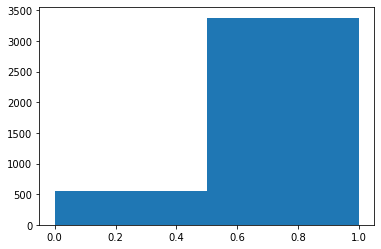

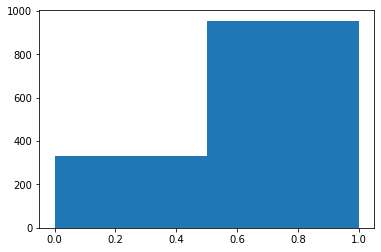

In [72]:
plt.hist(ArrestsWhite['released'], bins = 2)
plt.show()
plt.hist(ArrestsBlack['released'], bins = 2)
plt.show()

In [68]:
race_model = LinearRegression().fit(Arrests[["colour"]], Arrests["released"])
race_model.coef_

array([0.11659014])

In [73]:
check_model = LinearRegression().fit(Arrests[["colour"]], Arrests["checks"])

In [74]:
checkrelease_model = LinearRegression().fit(Arrests[["checks"]], Arrests["released"])

In [75]:
check_model.coef_

array([-0.61436111])

In [76]:
checkrelease_model.coef_

array([-0.06101365])

In [79]:
print(f'Mean # of Checks for Black Arrests {ArrestsBlack["checks"].mean()}')
print(f'Mean # of Checks for White Arrests {ArrestsWhite["checks"].mean()}')      

Mean # of Checks for Black Arrests 2.099378881987578
Mean # of Checks for White Arrests 1.485017775520569
